This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a ml model capable of predicting whether or not someone has heart disease based on their medical attributes.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [67]:
df = pd.read_csv("heart-disease.csv")
df.shape

### https://archive.ics.uci.edu/ml/datasets/heart+Disease ###

(303, 14)

In [68]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

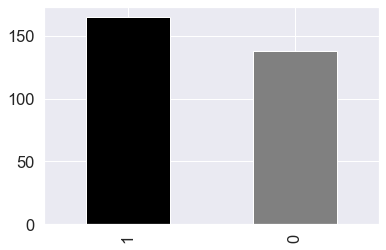

In [70]:
df["target"].value_counts().plot(kind="bar",color=["black", "grey"]);

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [72]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [73]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [74]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [75]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


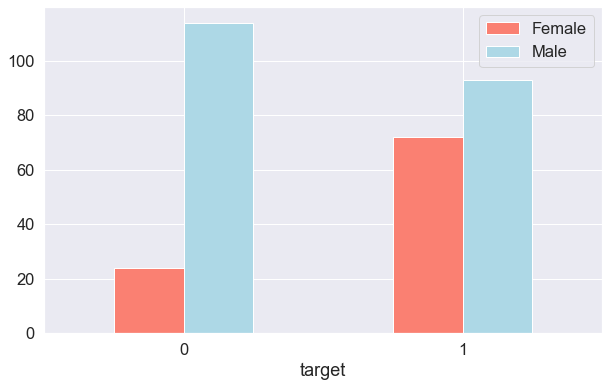

In [76]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [77]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [78]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

#### Age vs Max heart rate 

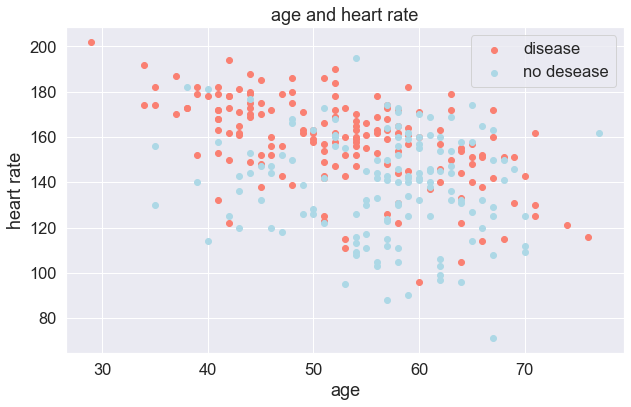

In [79]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");
plt.title('age and heart rate')
plt.xlabel('age')
plt.ylabel('heart rate')
plt.legend(['disease', 'no desease']);

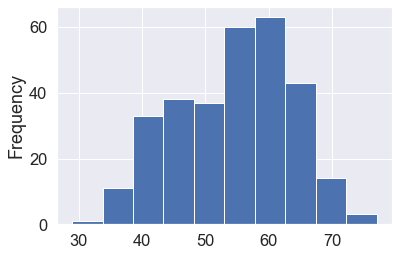

In [80]:
df.age.plot.hist();

### cp - chest pain type
*0: Typical angina: chest pain related decrease blood supply to the heart
*1: Atypical angina: chest pain not related to heart
*2: Non-anginal pain: typically esophageal spasms (non heart related)
*3: Asymptomatic: chest pain not showing signs of disease

In [81]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0, 0.5, 'amount')

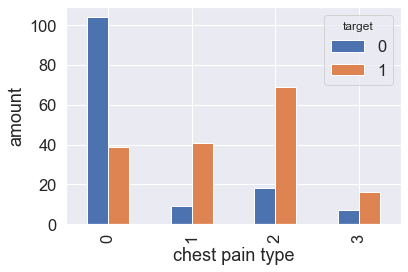

In [82]:
pd.crosstab(df.cp, df.target).plot(kind="bar")
plt.xlabel("chest pain type")
plt.ylabel("amount")

In [83]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


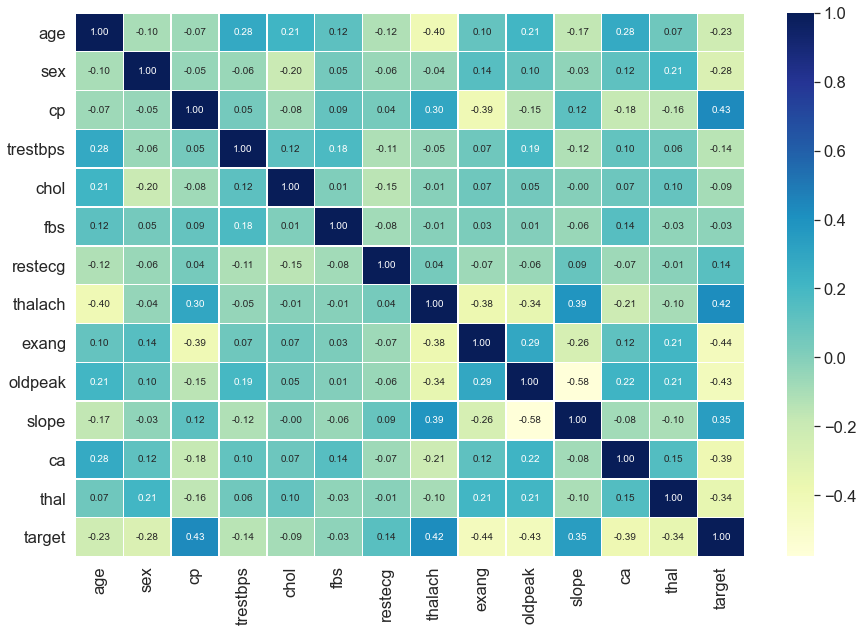

In [85]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [86]:
### ml

In [87]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
X = df.drop("target", axis=1)
y = df["target"]

np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3


In [90]:
len(y_train)

242

In [91]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(3)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [92]:
scores = fit_and_score(models, X_train, X_test, y_train, y_test)
scores

C:\Users\stefan\Desktop\ml-practice\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8360655737704918}

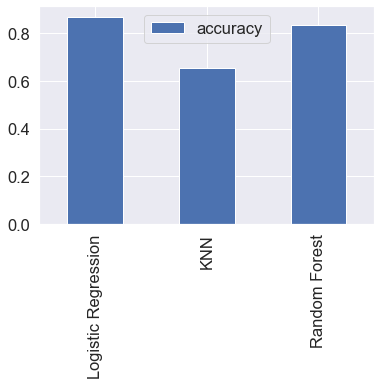

In [93]:
compare = pd.DataFrame(scores, index=["accuracy"])
compare.T.plot.bar();

In [94]:
#KNN
train_scores = []
test_scores = []
neighbors = range(1, 21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
train_scores

[1.0,
 0.8140495867768595,
 0.7892561983471075,
 0.7479338842975206,
 0.7727272727272727,
 0.7520661157024794,
 0.731404958677686,
 0.7355371900826446,
 0.7355371900826446,
 0.731404958677686,
 0.7231404958677686,
 0.6900826446280992,
 0.7107438016528925,
 0.6983471074380165,
 0.6983471074380165,
 0.6776859504132231,
 0.6900826446280992,
 0.6859504132231405,
 0.6859504132231405,
 0.6942148760330579]

In [95]:
test_scores

[0.5573770491803278,
 0.5081967213114754,
 0.6065573770491803,
 0.5573770491803278,
 0.6557377049180327,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.5901639344262295,
 0.6229508196721312,
 0.6065573770491803,
 0.6229508196721312,
 0.5573770491803278]

Text(0, 0.5, 'model')

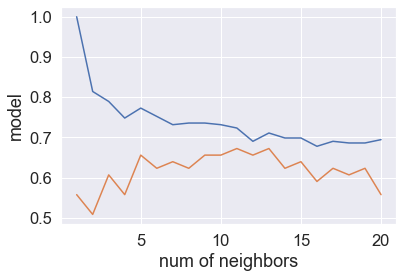

In [96]:
plt.plot(neighbors, train_scores, label = "train score")
plt.plot(neighbors, test_scores, label = "test score")
plt.xlabel("num of neighbors")
plt.ylabel("model")

In [97]:
#randomized search cv
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [98]:
np.random.seed(3)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [99]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [100]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [101]:
##random forest
np.random.seed(3)
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [102]:
rs_rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': 10}

In [103]:
rs_rf.score(X_test, y_test)

0.8360655737704918

In [104]:
scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8360655737704918}

In [105]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


In [106]:
gs_log_reg.best_params_

{'C': 117.21022975334793, 'solver': 'liblinear'}

In [107]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [108]:
### evalution
y_preds = gs_log_reg.predict(X_test)
y_preds
y_test

245    0
162    1
10     1
161    1
73     1
      ..
102    1
83     1
259    0
121    1
61     1
Name: target, Length: 61, dtype: int64

[[16  5]
 [ 2 38]]


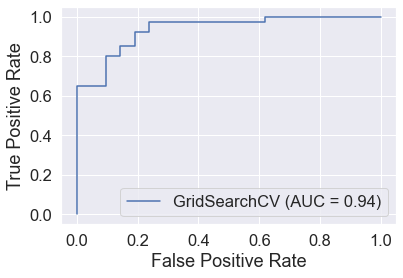

In [109]:
plot_roc_curve(gs_log_reg, X_test, y_test)
print(confusion_matrix(y_test, y_preds))

In [110]:
sns.set(font_scale=1.5)

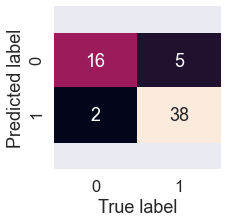

In [111]:
def plot_conf_mat(y_test, y_preds):
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [112]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.88      0.95      0.92        40

    accuracy                           0.89        61
   macro avg       0.89      0.86      0.87        61
weighted avg       0.89      0.89      0.88        61



In [113]:
gs_log_reg.best_params_

{'C': 117.21022975334793, 'solver': 'liblinear'}

In [114]:
clf = LogisticRegression(C=117.21022975334793,
                         solver="liblinear")

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.80327869, 0.8852459 , 0.83606557, 0.86666667, 0.76666667])

In [115]:
cv_acc = np.mean(cv_acc)
cv_acc

0.831584699453552

In [116]:
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8239892427392427

In [117]:
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8848484848484848

In [118]:
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8521267621267622

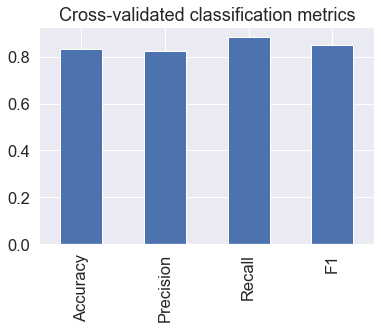

In [119]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                            index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [120]:
## feature Importance
clf = LogisticRegression(C=117.21022975334793,
                         solver="liblinear")

clf.fit(X_train, y_train);

# Check coef_
clf.coef_

array([[-0.01233941, -1.76083968,  0.80186548, -0.01957033, -0.00424713,
         0.31511646,  0.38781825,  0.0256183 , -0.88939747, -0.52517354,
         0.56264443, -0.62796121, -0.86638709]])

In [121]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [122]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.012339413983886532,
 'sex': -1.760839677817711,
 'cp': 0.8018654767955357,
 'trestbps': -0.01957032557988432,
 'chol': -0.004247128802549275,
 'fbs': 0.3151164574242431,
 'restecg': 0.38781824773778073,
 'thalach': 0.025618296842843606,
 'exang': -0.8893974690882805,
 'oldpeak': -0.5251735416536594,
 'slope': 0.5626444275348289,
 'ca': -0.6279612107211974,
 'thal': -0.8663870858284227}

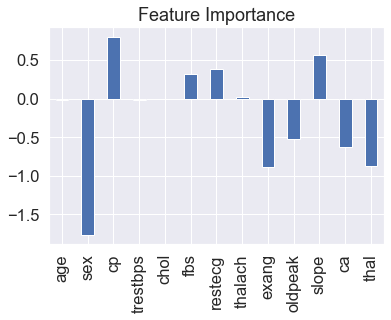

In [123]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [124]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [125]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
